In [30]:
import pandas as pd

#Loaded the dataset
df = pd.read_csv('/content/sample_data/heart.csv') #URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

#Checking if there are any missing values
print(df.isnull().sum())

#No missing values detected so we can go to next step

print("---------------------------------------------------------")

#finding duplicated
duplicates = df[df.duplicated()]
print(duplicates)

print("---------------------------------------------------------")

#removing duplicates
df = df.drop_duplicates()
print(df)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
---------------------------------------------------------
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0 

In [31]:
#Checking types for converting
print(df.dtypes)

print("---------------------------------------------------------")

#Encoding values that are not numeric
df_encoded = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)
print(df_encoded)

print("---------------------------------------------------------")

#Assuming target is the output column (heart disease: 0 = No, 1 = Yes)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
#Visualizing test column
print(X,y)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
---------------------------------------------------------
     age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0     52    1       125   212    0        1      168      0      1.0   2   
1     53    1       140   203    1        0      155      1      3.1   0   
2     70    1       145   174    0        1      125      1      2.6   0   
3     61    1       148   203    0        1      161      0      0.0   1   
4     62    0       138   294    1        1      106      0      1.9   3   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...  ..   
723   68    0       120   211    0        0      115      0      1.5   0   
733   44    0       108   141    0      

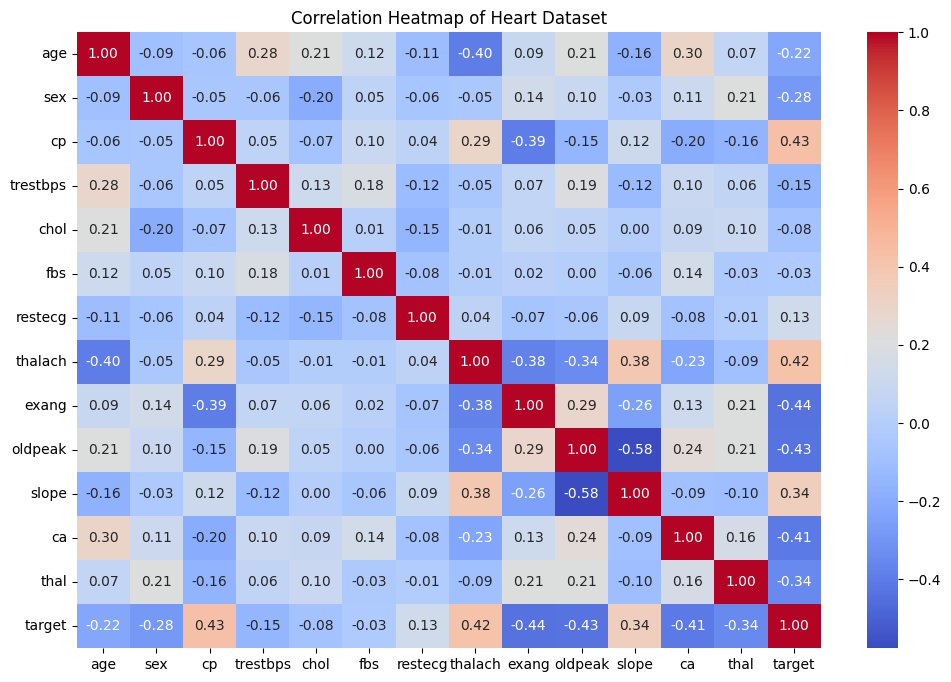

---------------------------------------------------------
target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


In [32]:
#Visualizing the Relation among features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Heart Dataset")
plt.show()

print("---------------------------------------------------------")

#Finding features that are strongly corelated with target
correlation = df.corr()['target'].sort_values(ascending=False)
print(correlation)

In [33]:
#Splitting data in test and training portions for model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training models
#Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print("---------------------------------------------------------")

#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  #Random Forest does not need scaling
y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Logistic Regression Results:
Accuracy: 0.7377049180327869
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        32
           1       0.69      0.83      0.75        29

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61

Confusion Matrix:
 [[21 11]
 [ 5 24]]
---------------------------------------------------------

 Random Forest Results:
Accuracy: 0.7868852459016393
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

Confusion Matrix:
 [[23  9]
 [ 4 25]]


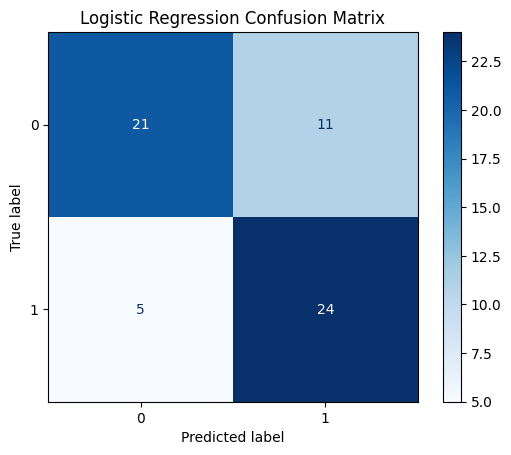

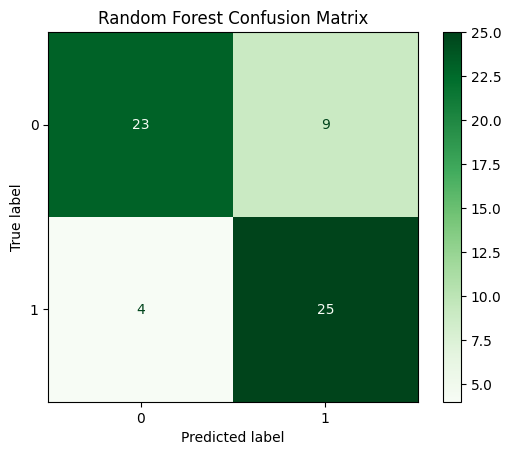

In [34]:
#Visualizing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [35]:
#GridSearchCV for tuning hyperparameters for Logistic Regression
from sklearn.model_selection import GridSearchCV

param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5)
grid_log.fit(X_train_scaled, y_train)

print("Best parameters for Logistic Regression:", grid_log.best_params_)
print("Best cross-validation score:", grid_log.best_score_)

Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Best cross-validation score: 0.8380952380952381


In [36]:
#GridSearchCV for tuning hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best cross-validation score:", grid_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.821513605442177


In [37]:
#Retraining models after tuning
best_log_model = grid_log.best_estimator_
best_rf_model = grid_rf.best_estimator_

#Evaluating again using test set
from sklearn.metrics import accuracy_score

print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, best_log_model.predict(X_test_scaled)))
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_model.predict(X_test)))


Tuned Logistic Regression Accuracy: 0.7540983606557377
Tuned Random Forest Accuracy: 0.8032786885245902
